In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt #绘图的库

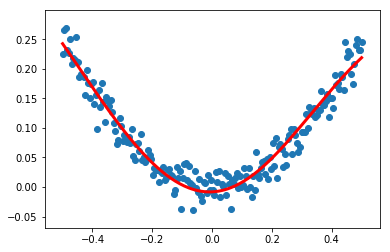

In [11]:
#使用numpy生成200个随机点,[:,np.newaxis]增加一个维度
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data) + noise

# 定义两个placeholder
x= tf.placeholder(tf.float32,[None,1])
y= tf.placeholder(tf.float32,[None,1])

#构建一个神经网络：输入一个x点，经过一个神经网络计算，得到一个y值，预测值
#输入层：一个点，一个神经元
#中间层：10个神经元
#输出层：一个点，一个神经元

# 定义神经网络的中间层
Weights_L1 = tf.Variable(tf.random_normal([1,10])) #权值，是个变量，连接输入层和中间层
biases_L1 = tf.Variable(tf.zeros([1,10]))          #偏制值，初始化为0
Wx_plus_b_L1 = tf.matmul(x,Weights_L1) + biases_L1 #计算信号的总和，x是矩阵，是输入
L1 = tf.nn.tanh(Wx_plus_b_L1)                      #中间层的输出，双曲正切函数作为激活函数

#定义神经网络输出层 
Weights_L2 = tf.Variable(tf.random_normal([10,1])) #权值，连接中间层和输出层
biases_L2 = tf.Variable(tf.zeros([1,1]))           #偏置值
Wx_plus_b_L2 = tf.matmul(L1,Weights_L2) + biases_L2#信号的总和，L1是中间层的输出值
prediction = tf.nn.tanh(Wx_plus_b_L2)              #输出值，激活函数

#二次代价函数
loss = tf.reduce_mean(tf.square(y-prediction))
#使用梯度下降法
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(2000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
    
    # 获得预测值
    prediction_value = sess.run(prediction,feed_dict={x:x_data})
    #绘图
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,'r-',lw=3)
    plt.show()